#initiating libraries

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
path = '/content/drive/MyDrive/data'

In [ ]:
train_path = '/content/drive/MyDrive/data/train'
test_path = '/content/drive/MyDrive/data/val'

In [ ]:
image_size = [224,224]

#Resnet50 Architecture

In [ ]:
resnet = ResNet50(input_shape = image_size + [3], weights='imagenet', include_top=False)
for parameter in resnet.layers:
  parameter.trainable= False

resnet.summary()
resnet.output
x = Flatten()(resnet.output)
prediction = Dense(len(folder),activation='softmax')(x)

model = Model(inputs  = resnet.input, outputs = prediction)
model.compile(loss = 'categorical_crossentropy',optimizer= 'adam', metrics='accuracy')
res = model.fit_generator(train_set, validation_data= test_set, epochs = 25, steps_per_epoch=len(train_set), verbose=1,validation_steps = len(test_set) )

plt.plot(res.history['loss'],label='train_loss')
plt.plot(res.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(res.history['accuracy'],label='train_accuracy')
plt.plot(res.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
resnet = ResNet50(input_shape = image_size + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
for parameter in resnet.layers:
  parameter.trainable= False

In [ ]:
folder = glob('/content/drive/MyDrive/data/train/*')


In [ ]:
print(folder)

['/content/drive/MyDrive/data/train/diseased cotton leaf', '/content/drive/MyDrive/data/train/fresh cotton leaf', '/content/drive/MyDrive/data/train/diseased cotton plant', '/content/drive/MyDrive/data/train/fresh cotton plant']


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
resnet.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folder),activation='softmax')(x)

model = Model(inputs  = resnet.input, outputs = prediction)

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer= 'adam', metrics='accuracy')

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip= True )
test_data = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_set = train_data.flow_from_directory(train_path, target_size = image_size, batch_size = 64, class_mode= 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_data.flow_from_directory(test_path, target_size = image_size, batch_size = 64, class_mode= 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
res = model.fit_generator(train_set, validation_data= test_set, epochs = 25, steps_per_epoch=len(train_set), verbose=1,validation_steps = len(test_set) )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
31/31 [==============================] - 1341s 42s/step - loss: 3.0714 - accuracy: 0.3398 - val_loss: 1.3255 - val_accuracy: 0.5432
Epoch 2/25
31/31 [==============================] - 44s 1s/step - loss: 1.0973 - accuracy: 0.5643 - val_loss: 1.0546 - val_accuracy: 0.5679
Epoch 3/25
31/31 [==============================] - 44s 1s/step - loss: 1.0402 - accuracy: 0.5951 - val_loss: 0.8253 - val_accuracy: 0.6883
Epoch 4/25
31/31 [==============================] - 44s 1s/step - loss: 0.8809 - accuracy: 0.6397 - val_loss: 0.7320 - val_accuracy: 0.7407
Epoch 5/25
31/31 [==============================] - 44s 1s/step - loss: 0.8319 - accuracy: 0.6627 - val_loss: 0.8087 - val_accuracy: 0.6481
Epoch 6/25
31/31 [==============================] - 43s 1s/step - loss: 0.8833 - accuracy: 0.6417 - val_loss: 0.7118 - val_accuracy: 0.7346
Epoch 7/25
31/31 [==============================] - 44s 1s/step - loss: 0.7609 - accuracy: 0.6807 - val_loss: 0.6256 - val_accuracy: 0.7901
Epoch 8/25
31/31 

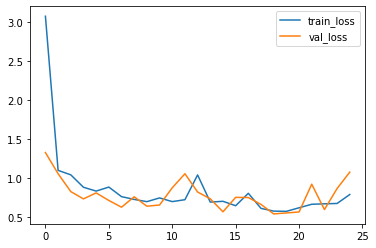

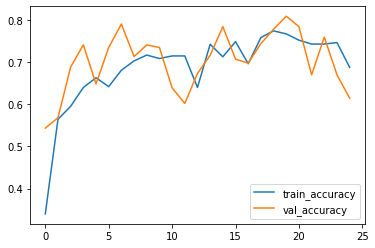

In [ ]:
plt.plot(res.history['loss'],label='train_loss')
plt.plot(res.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(res.history['accuracy'],label='train_accuracy')
plt.plot(res.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

#vgg19 Architecture

In [ ]:
image_size = [224,224]

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


31/31 [==============================] - 794s 25s/step - loss: 1.0105 - accuracy: 0.6612 - val_loss: 0.4107 - val_accuracy: 0.8179


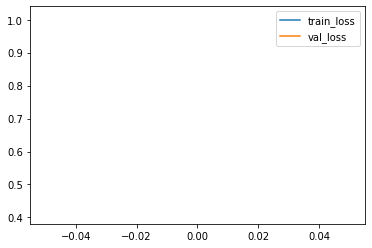

NameError: ignored

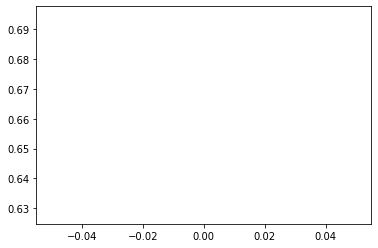

In [ ]:
vgg = VGG19(input_shape = image_size + [3], weights='imagenet', include_top=False)
for parameter in vgg.layers:
  parameter.trainable= False

vgg.summary()
vgg.output
x = Flatten()(vgg.output)
prediction = Dense(len(folder),activation='softmax')(x)

train_data = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip= True )
test_data = ImageDataGenerator(rescale = 1./255)

train_set = train_data.flow_from_directory(train_path, target_size = image_size, batch_size = 64, class_mode= 'categorical')
test_set = test_data.flow_from_directory(test_path, target_size = image_size, batch_size = 64, class_mode= 'categorical')

model = Model(inputs = vgg.input, outputs = prediction)
model.compile(loss = 'categorical_crossentropy',optimizer= 'adam', metrics='accuracy')
vgg = model.fit_generator(train_set, validation_data= test_set, epochs = 25, steps_per_epoch=len(train_set), verbose=1,validation_steps = len(test_set) )

plt.plot(vgg.history['loss'],label='train_loss')
plt.plot(vgg.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(vgg.history['accuracy'],label='train_accuracy')
plt.plot(vgg.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

#Inception Architecture

In [ ]:
inc = InceptionV3(input_shape = image_size + [3], weights='imagenet', include_top=False)
for parameter in inc.layers:
  parameter.trainable= False

inc.summary()
inc.output
x = Flatten()(inc.output)
prediction = Dense(len(folder),activation='softmax')(x)

train_data = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip= True )
test_data = ImageDataGenerator(rescale = 1./255)

train_set = train_data.flow_from_directory(train_path, target_size = image_size, batch_size = 64, class_mode= 'categorical')
test_set = test_data.flow_from_directory(test_path, target_size = image_size, batch_size = 64, class_mode= 'categorical')

model = Model(inputs = inc.input, outputs = prediction)
model.compile(loss = 'categorical_crossentropy',optimizer= 'adam', metrics='accuracy')
inc = model.fit_generator(train_set, validation_data= test_set, epochs = 1, steps_per_epoch=len(train_set), verbose=1,validation_steps = len(test_set) )

plt.plot(inc.history['loss'],label='train_loss')
plt.plot(inc.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(inc.history['accuracy'],label='train_accuracy')
plt.plot(inc.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


 6/31 [====>.........................] - ETA: 21s - loss: 7.7041 - accuracy: 0.3724

KeyboardInterrupt: ignored